<div class="alert alert-info">
    <h2 align="center"> A new profiling approach for DNA sequences based on the nucleotides' physicochemical features: Corona case study</h2>
    <h3 align="center"><a href="http://sharif.edu/~koohi/">Saeedeh Akbari Rokn Abadi</a>, <a href="http://sharif.edu/~koohi/">Amirhossein Mohammadi</a>, <a href="http://sharif.edu/~koohi/">Somayyeh Koohi</a></h3>
</div>

## Import Library and Modules


In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
warnings.filterwarnings('ignore')

## Sum Confusion Matrix

In [2]:
sum_cm=0
for i in range(1,11):
    sum_cm=sum_cm+np.loadtxt('CM/CM_fold'+str(i)+'.txt',dtype=int)

## Save Total Confusion Matrix

In [3]:
df = pd.DataFrame(sum_cm)
df.to_excel(excel_writer = "Human Coronavirus10folds.xlsx")

## Confusion Matrix Method

In [4]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    csfont = {'fontname':'Times New Roman'}
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=20,weight='bold',**csfont)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=70,fontsize=10,**csfont)
        plt.yticks(tick_marks, target_names,fontsize=10,**csfont)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


            
    plt.tight_layout()
    plt.ylabel('True label',fontsize=15,**csfont)
    plt.xlabel('Predicted label',fontsize=15,**csfont)
    plt.savefig('Human Coronavirus-CM.png',dpi=350,bbox_inches = 'tight',
    pad_inches = 0.5)
    
    plt.show()
    
    

In [5]:
target_names=['HCoV-229E','HCoV-HKU1','HCoV-NL63','HCoV-OC43','MERS-CoV','SARS-COV-1','SARS-COV-2']
    

## Plot Confusion Matrix

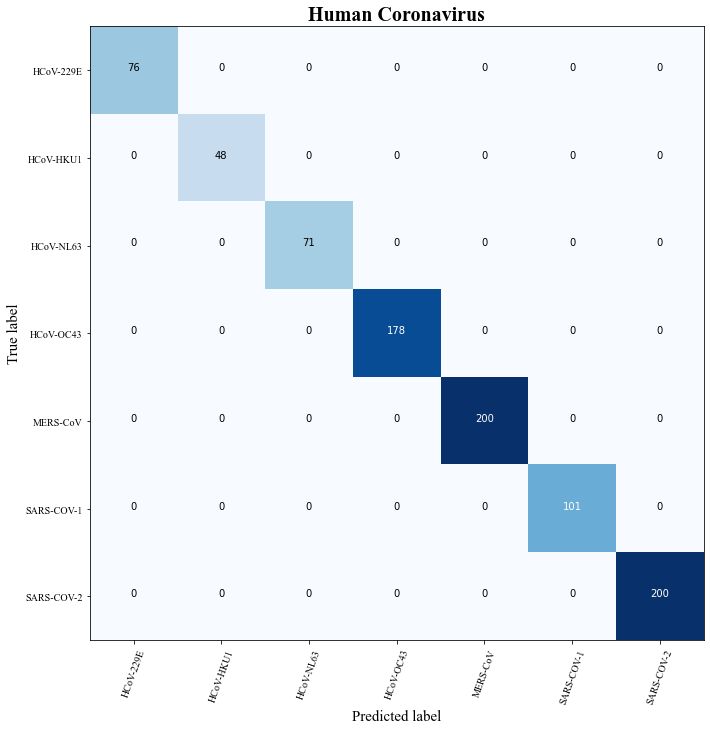

In [7]:
plot_confusion_matrix(cm=sum_cm,
                      normalize    = False,
                      target_names = target_names,
                      title        = "Human Coronavirus")